In [1]:
from time import perf_counter as tick
import os, re
import numpy as np
import cycler as cycler
import matplotlib.pyplot as mp
import scipy.interpolate as sp
import spec_funcs as sf
import fit_funcs as ff
from scipy.fftpack import fft, fftfreq, ifft
mp.style.use('signature.mplstyle')


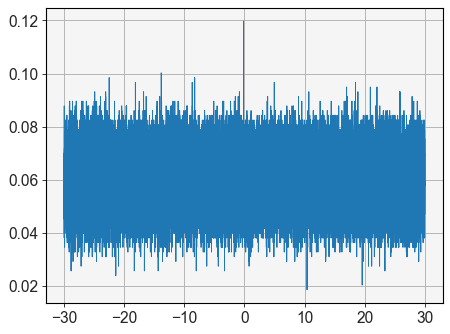

In [2]:
path = 'C:\\Users\\sk88\\Desktop\\Comp_sig\\COMP_UNF.csv'

time = []
amp = []

with open(path, 'r', newline='') as raw_file:
    for row in raw_file:
        if sf.check_str(row) == True:
            temp = re.split('\t|,|;', row)
            time.append(float(temp[0]))
            amp.append(float(temp[1]))

mp.plot(time, amp)

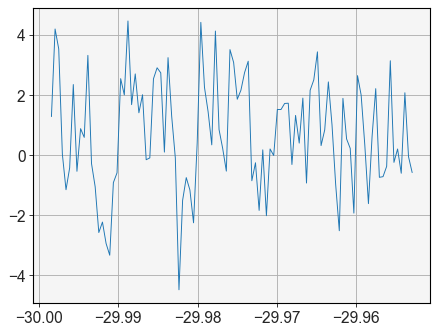

In [3]:
freq_list = [10, 90, 101, 200, 210, 500, 550, 1000]
omega_list = [[2*np.pi*value] for value in freq_list]
N = np.size(amp)
T= time[1] - time[0]
test_time = np.arange(start=np.min(time), stop=np.max(time)+T, step=T)
waves = [np.sin(omega*test_time) for omega in omega_list]

wave_sum = 0
for wave in waves:
    wave_sum += wave

mp.plot(test_time[0:100], wave_sum[0:100])

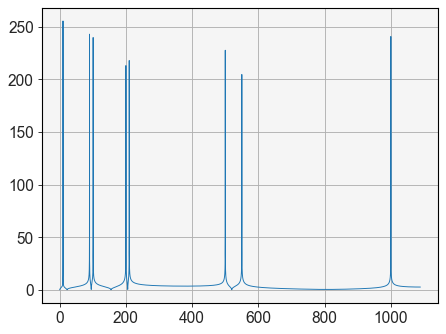

In [4]:
test_sig = fft(wave_sum)
test_freq = fftfreq(N,T)

mp.plot(test_freq[0:N//2], np.sqrt(np.abs(test_sig[0:N//2])))

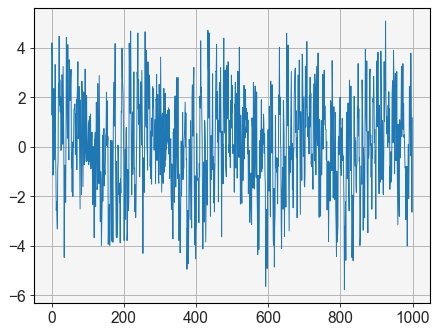

In [5]:
mp.plot(wave_sum[0:1000])

Text(0, 0.5, 'Amplitude (AU)')

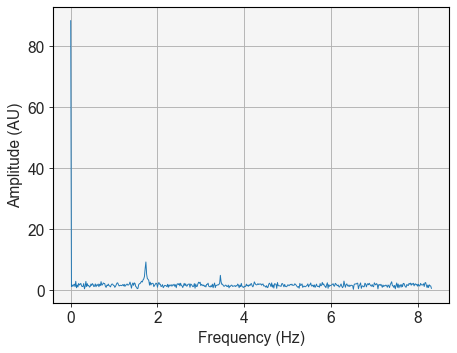

In [6]:
cryo_sig = fft(amp)
cryo_freq = fftfreq(N, T)

mp.plot(cryo_freq[0:500], np.sqrt(np.abs(cryo_sig))[0:500])
mp.xlabel('Frequency (Hz)')
mp.ylabel('Amplitude (AU)')

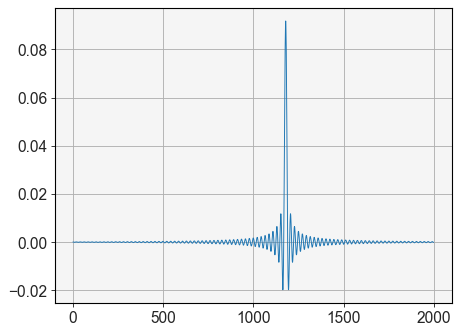

In [7]:
sampling_rate = 1/T
cut_off = 100
cut_off_high = 500
trans_band = 2
b = trans_band/sampling_rate
fl = cut_off/sampling_rate
fh = cut_off_high/sampling_rate

M = int(np.ceil((4/b)))
lpf = ff.low_pass(M, fl)
hpf = ff.high_pass(M, fh)
filtered = np.convolve(lpf, wave_sum)
high = np.convolve(hpf, wave_sum)
bpf = ff.band_pass(M, fl, M, fh)
band = np.convolve(bpf, wave_sum)
mp.plot(lpf[1000:3000])


In [8]:
len(wave_sum), len(filtered), len(lpf), len(filtered) - len(wave_sum)

(130713, 135071, 4359, 4358)

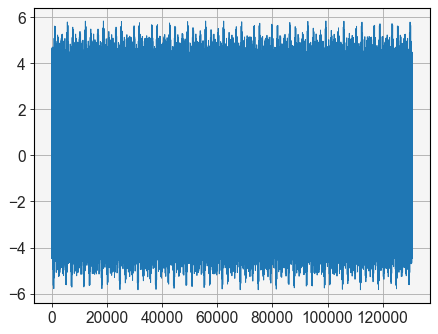

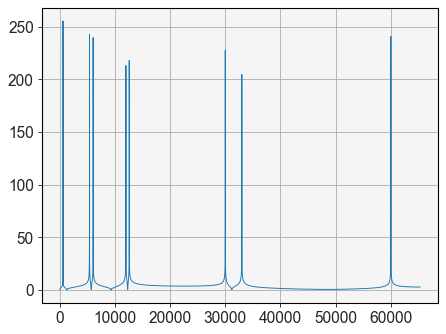

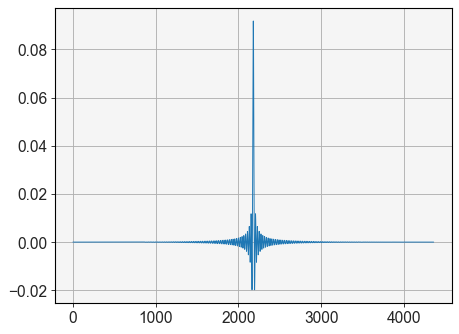

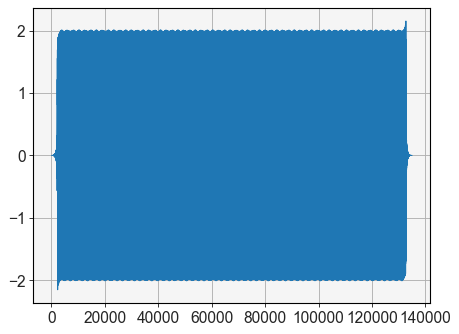

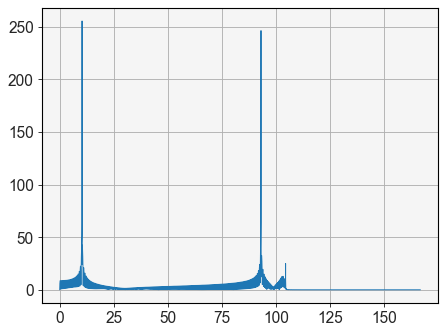

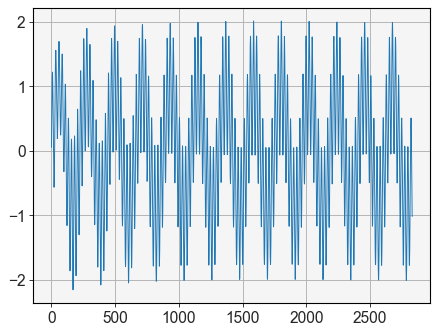

In [9]:
mp.figure()
mp.plot(wave_sum)

mp.figure()
mp.plot(np.sqrt(np.abs(sf.fft(wave_sum)))[0:N//2])

mp.figure()
mp.plot(lpf)

mp.figure()
mp.plot(filtered)

mp.figure()
mp.plot(test_freq[0:10000], np.sqrt(np.abs(sf.fft(filtered)))[0:10000])

mp.figure()
mp.plot(filtered[2170:5000])

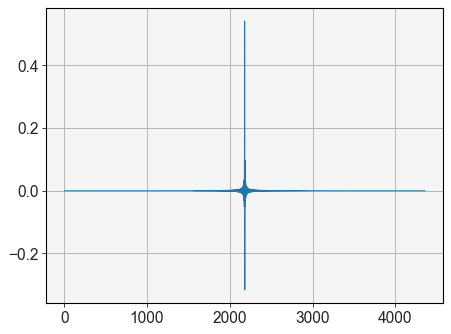

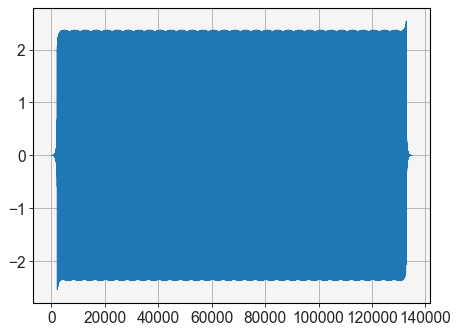

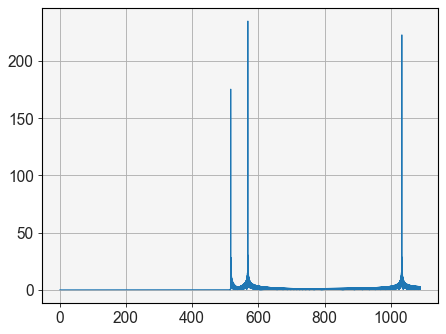

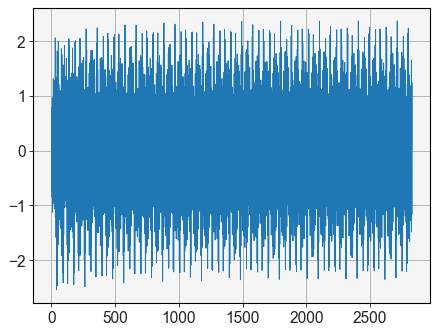

In [10]:
mp.figure()
mp.plot(hpf)

mp.figure()
mp.plot(high)

mp.figure()
mp.plot(test_freq[0:N//2], np.sqrt(np.abs(sf.fft(high)))[0:N//2])

mp.figure()
mp.plot(high[2170:5000])

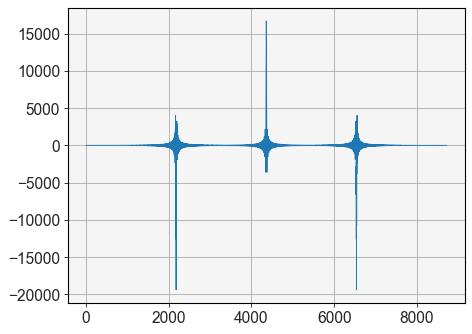

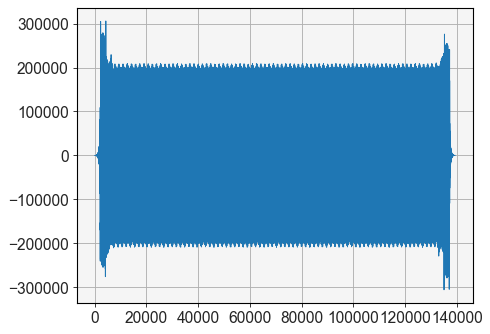

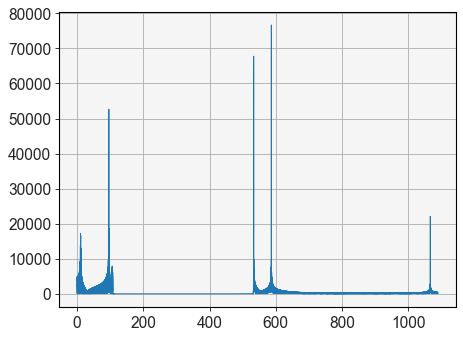

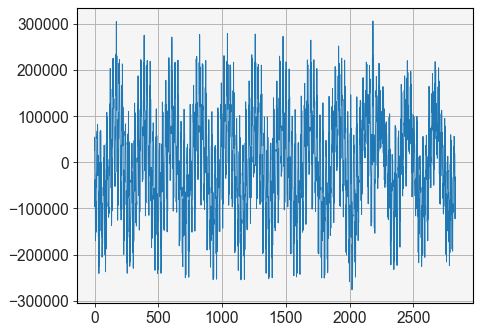

In [11]:
mp.figure()
mp.plot(bpf)

mp.figure()
mp.plot(band)

mp.figure()
mp.plot(test_freq[0:N//2], np.sqrt(np.abs(sf.fft(band)))[0:N//2])

mp.figure()
mp.plot(band[2170:5000])

In [12]:
pad_ws = np.zeros(len(lpf) - 1)
padded_ws = np.append(np.asarray(wave_sum), pad_ws)
#lpd = np.convolve(padded_ws, padded_lpf)
lpfft = sf.fft(padded_lpf) * sf.fft(padded_ws)
mp.plot(sf.ifft(lpfft))

NameError: name 'padded_lpf' is not defined

In [ ]:
mp.plot(np.sqrt(np.abs(sf.fft(lpf)))[0:N//2])

In [ ]:
mp.plot((np.sqrt(np.abs(sf.fft(padded_lpf) * sf.fft(padded_ws)))))

In [ ]:
len(padded_lpf), len(padded_ws)

In [ ]:
sampling_rate = 1/T
cut_off = 800
trans_band = 2
b = trans_band/sampling_rate
fc = cut_off/sampling_rate
M = int(np.ceil((4/b)))
n = np.arange(M)
hpf = ff.windowed_sinc_hp(n, M, fc)
pad_hf = np.zeros(np.asarray(wave_sum).shape)
padded = np.append(hpf, pad_hf)
mp.plot(padded)

In [ ]:
pad_ws = np.zeros(np.asarray(hpf).shape)
padded_ws = np.append(np.asarray(wave_sum), pad_ws)
mp.plot(padded_ws)

In [ ]:
filtered_pad = np.convolve(padded_ws, padded)

mp.plot(test_time, filtered_pad)